In [16]:
##Importing Pandas, numpy, matplotlib for later
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

# from Johns code
from scipy.stats import chi2
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
global my_dtype,molwt,catnum,catwt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

# import csv as dataframe(df) to manipulate in pd
df_all = pd.read_csv('Melt_cal_2.csv')
#if want to change sample back to column --> Wtpt.reset_index()
#pd.set_option('max_columns', 40, 'max_rows', 40) - if a limit wanted.

index = df_all.index
columns = df_all.columns
data = df_all.values
df_all.fillna(0, inplace=True)
df_all.set_index('Experiment', inplace=True)


In [17]:
#check dataframe
df_all

,Reference,Pressure_kbar,Pressure_error,Temperature_degC,Phases,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,Cr2O3,Total,Alk Line,Sub line,Alkalinity (S),Alkalinity (A),Na2O+K2O
Experiment,,,,,,,,,,,,,,,,,,,,,,,
KN-54-2-2-1,Grove1992,0.001,0.00001,1210,gl,51.40,1.55,16.10,8.55,0.15,7.96,10.20,3.46,0.28,0.0,0.0,0.06,99.71,7.320,4.67660,0.93660,3.580,3.74
KN-54-2-2-1,Grove1992,0.001,0.00001,1207,gl-ol-sp,51.90,1.50,17.00,7.82,0.23,8.06,9.93,3.71,0.28,0.0,0.0,0.06,100.49,7.720,4.93360,0.94360,3.730,3.99
KN-54-2-2-1,Grove1992,0.001,0.00001,1205,gl-ol-pl,51.20,1.66,16.20,9.91,0.23,7.50,10.10,3.65,0.30,0.0,0.0,0.07,100.82,7.160,4.57380,0.62380,3.210,3.95
KN-54-2-2-1,Grove1992,0.001,0.00001,1196,gl-ol-pl,52.50,1.74,16.10,8.63,0.15,7.47,10.30,3.47,0.29,0.0,0.0,0.05,100.70,8.200,5.24200,1.48200,4.440,3.76
KN-54-2-2-1,Grove1992,0.001,0.00001,1185,gl-ol-pl,51.50,1.90,14.90,9.09,0.18,6.80,10.40,3.60,0.33,0.0,0.0,0.06,98.76,7.400,4.72800,0.79800,3.470,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A16P50-3,Pan and Longhi 1990,0.001,0,1214,gl-ol-pl-sp-Me,45.81,0.00,20.75,0.00,0.00,8.77,19.59,5.12,0.00,0.0,0.0,0.00,100.04,2.848,1.80334,-3.31666,-2.272,5.12
A19P50-1,Pan and Longhi 1990,0.001,0,1230,gl-ol-pl,46.30,0.00,21.42,0.00,0.00,8.86,17.67,5.06,0.00,0.0,0.0,0.00,99.31,3.240,2.05520,-3.00480,-1.820,5.06
A21P50-1,Pan and Longhi 1990,0.001,0,1235,gl-ol-Me,46.24,0.00,19.04,0.00,0.00,9.62,20.46,3.90,0.00,0.0,0.0,0.00,99.26,3.192,2.02436,-1.87564,-0.708,3.90


In [18]:
#filter out data with low MgO
df = df_all.drop(df_all[df_all.MgO<4.0].index)

#check dataframe
df 

,Reference,Pressure_kbar,Pressure_error,Temperature_degC,Phases,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,Cr2O3,Total,Alk Line,Sub line,Alkalinity (S),Alkalinity (A),Na2O+K2O
Experiment,,,,,,,,,,,,,,,,,,,,,,,
KN-54-2-2-1,Grove1992,0.001,0.00001,1210,gl,51.40,1.55,16.10,8.55,0.15,7.96,10.20,3.46,0.28,0.0,0.0,0.06,99.71,7.320,4.67660,0.93660,3.580,3.74
KN-54-2-2-1,Grove1992,0.001,0.00001,1207,gl-ol-sp,51.90,1.50,17.00,7.82,0.23,8.06,9.93,3.71,0.28,0.0,0.0,0.06,100.49,7.720,4.93360,0.94360,3.730,3.99
KN-54-2-2-1,Grove1992,0.001,0.00001,1205,gl-ol-pl,51.20,1.66,16.20,9.91,0.23,7.50,10.10,3.65,0.30,0.0,0.0,0.07,100.82,7.160,4.57380,0.62380,3.210,3.95
KN-54-2-2-1,Grove1992,0.001,0.00001,1196,gl-ol-pl,52.50,1.74,16.10,8.63,0.15,7.47,10.30,3.47,0.29,0.0,0.0,0.05,100.70,8.200,5.24200,1.48200,4.440,3.76
KN-54-2-2-1,Grove1992,0.001,0.00001,1185,gl-ol-pl,51.50,1.90,14.90,9.09,0.18,6.80,10.40,3.60,0.33,0.0,0.0,0.06,98.76,7.400,4.72800,0.79800,3.470,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A16P50-3,Pan and Longhi 1990,0.001,0,1214,gl-ol-pl-sp-Me,45.81,0.00,20.75,0.00,0.00,8.77,19.59,5.12,0.00,0.0,0.0,0.00,100.04,2.848,1.80334,-3.31666,-2.272,5.12
A19P50-1,Pan and Longhi 1990,0.001,0,1230,gl-ol-pl,46.30,0.00,21.42,0.00,0.00,8.86,17.67,5.06,0.00,0.0,0.0,0.00,99.31,3.240,2.05520,-3.00480,-1.820,5.06
A21P50-1,Pan and Longhi 1990,0.001,0,1235,gl-ol-Me,46.24,0.00,19.04,0.00,0.00,9.62,20.46,3.90,0.00,0.0,0.0,0.00,99.26,3.192,2.02436,-1.87564,-0.708,3.90


In [19]:
# turn weight percent oxides into mole fractions
names=['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO', 'MnO', 'CaO', 'Na2O', 'K2O', 'P2O5','Cr2O3','H2O']
formats=['<f8','<f8','<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8']
my_dtype = dict(names=names, formats=formats)
molwt = np.array([(60.08,79.866,101.96,71.844,40.3044,70.9374,56.0774,61.9789,94.20,283.89,151.99,18.01528)],dtype=my_dtype)
catnum = np.array([(1.,1.,2.,1.,1.,1.,1.,2.,2.,2.,2.,2.)],dtype=my_dtype)
catwt = np.zeros_like(molwt) # mol weight of oxide with single cation in formula unit
for n in my_dtype['names']:
    catwt[n] = molwt[n]/catnum[n] # Beattie style single cation molar fracs

In [20]:
#convert wt% oxide to atomic % of cation
def wt2cat (majwt):
    # create empty dataframe of same shape
    catprop= df*0 
    for n in my_dtype['names']:
        #calc cation wt sum of each sample?
        catprop[n] = majwt[n]/catwt[n]
        
    catprop['molsum']= catprop.sum(axis=1)
    Msum = catprop['molsum'].to_numpy()
    
    catfrac = df*0
    for n in my_dtype['names']:
        catfrac[n] = catprop[n]/Msum 
    return catfrac

In [21]:
def xpred (p,xna,xk,xti,xfe,xsi):
    "calculate XAl,XCa,XMg for Yang model"
     
    xalp = 0.236 + 0.00218*p + 0.109*xna + 0.593*xk -0.350*xti -0.299*xfe - 0.130*xsi
    xcap = 1.133 - 0.00339*p -0.569*xna -0.776*xk-0.672*xti-0.214*xfe-3.355*xsi + 2.830*(xsi*xsi)
    xmgp = -0.277 + 0.00114*p -0.543*xna -0.947*xk -0.117*xti-0.490*xfe+2.086*xsi -2.400*(xsi*xsi) # original from table   
 
    return(xalp,xcap,xmgp)

In [22]:
def cc (pkbar,xna,xk,xti,xfe,xsi,xalo,xcao,xmgo,xals,xcas,xmgs):
    "chi2 function to minimise"
    xalp,xcap,xmgp = xpred(pkbar,xna,xk,xti,xfe,xsi)    
    cc =((xalo-xalp)/xals)**2. + ((xcao-xcap)/xcas)**2. + ((xmgo-xmgp)/xmgs)**2.
 
    return(cc)

In [23]:
# Yang et al., 1996 model - Not Voight et al., 2017
majwt = df.copy()
xobs = wt2cat(majwt)    
xalo,xcao,xmgo = xobs['Al2O3'],xobs['CaO'],xobs['MgO']
# 5% precision on major elements in glasses - 1 sig - estimate from NEAVE et al., 2015
xals,xcas,xmgs = 0.05*xalo,0.05*xcao,0.05*xmgo
xna,xk,xti,xfe,xsi = xobs['Na2O'],xobs['K2O'],xobs['TiO2'],xobs['FeO'],xobs['SiO2']
pkbar = 3.0
cctest = cc(pkbar,xna,xk,xti,xfe,xsi,xalo,xcao,xmgo,xals,xcas,xmgs)

ppmin = [] 
pprob = []

for q in range(len(xsi)):
    res = minimize_scalar(cc, method= 'brent', args = (xna[q],xk[q],xti[q],xfe[q],xsi[q],xalo[q],xcao[q],xmgo[q],xals[q],xcas[q],xmgs[q]))
    pmin = res.x
    cpmin = res.fun
    prob = 1- chi2.cdf(cpmin,2) # signifance value
    ppmin.append(pmin)
    pprob.append(prob)
       
df.loc[:,('Pressure_min')] = ppmin    
df.loc[:,('Probability')] = pprob 

#check columns append to datafame
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Reference,Pressure_kbar,Pressure_error,Temperature_degC,Phases,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,Cr2O3,Total,Alk Line,Sub line,Alkalinity (S),Alkalinity (A),Na2O+K2O,Pressure_min,Probability
Experiment,,,,,,,,,,,,,,,,,,,,,,,,,
KN-54-2-2-1,Grove1992,0.001,0.00001,1210,gl,51.40,1.55,16.10,8.55,0.15,7.96,10.20,3.46,0.28,0.0,0.0,0.06,99.71,7.320,4.67660,0.93660,3.580,3.74,5.964669,0.977532
KN-54-2-2-1,Grove1992,0.001,0.00001,1207,gl-ol-sp,51.90,1.50,17.00,7.82,0.23,8.06,9.93,3.71,0.28,0.0,0.0,0.06,100.49,7.720,4.93360,0.94360,3.730,3.99,7.122233,0.771960
KN-54-2-2-1,Grove1992,0.001,0.00001,1205,gl-ol-pl,51.20,1.66,16.20,9.91,0.23,7.50,10.10,3.65,0.30,0.0,0.0,0.07,100.82,7.160,4.57380,0.62380,3.210,3.95,6.203563,0.878380
KN-54-2-2-1,Grove1992,0.001,0.00001,1196,gl-ol-pl,52.50,1.74,16.10,8.63,0.15,7.47,10.30,3.47,0.29,0.0,0.0,0.05,100.70,8.200,5.24200,1.48200,4.440,3.76,4.168967,0.576837
KN-54-2-2-1,Grove1992,0.001,0.00001,1185,gl-ol-pl,51.50,1.90,14.90,9.09,0.18,6.80,10.40,3.60,0.33,0.0,0.0,0.06,98.76,7.400,4.72800,0.79800,3.470,3.93,1.532970,0.782547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A16P50-3,Pan and Longhi 1990,0.001,0,1214,gl-ol-pl-sp-Me,45.81,0.00,20.75,0.00,0.00,8.77,19.59,5.12,0.00,0.0,0.0,0.00,100.04,2.848,1.80334,-3.31666,-2.272,5.12,1.673984,0.013613
A19P50-1,Pan and Longhi 1990,0.001,0,1230,gl-ol-pl,46.30,0.00,21.42,0.00,0.00,8.86,17.67,5.06,0.00,0.0,0.0,0.00,99.31,3.240,2.05520,-3.00480,-1.820,5.06,4.508395,0.003213
A21P50-1,Pan and Longhi 1990,0.001,0,1235,gl-ol-Me,46.24,0.00,19.04,0.00,0.00,9.62,20.46,3.90,0.00,0.0,0.0,0.00,99.26,3.192,2.02436,-1.87564,-0.708,3.90,-0.662707,0.149058


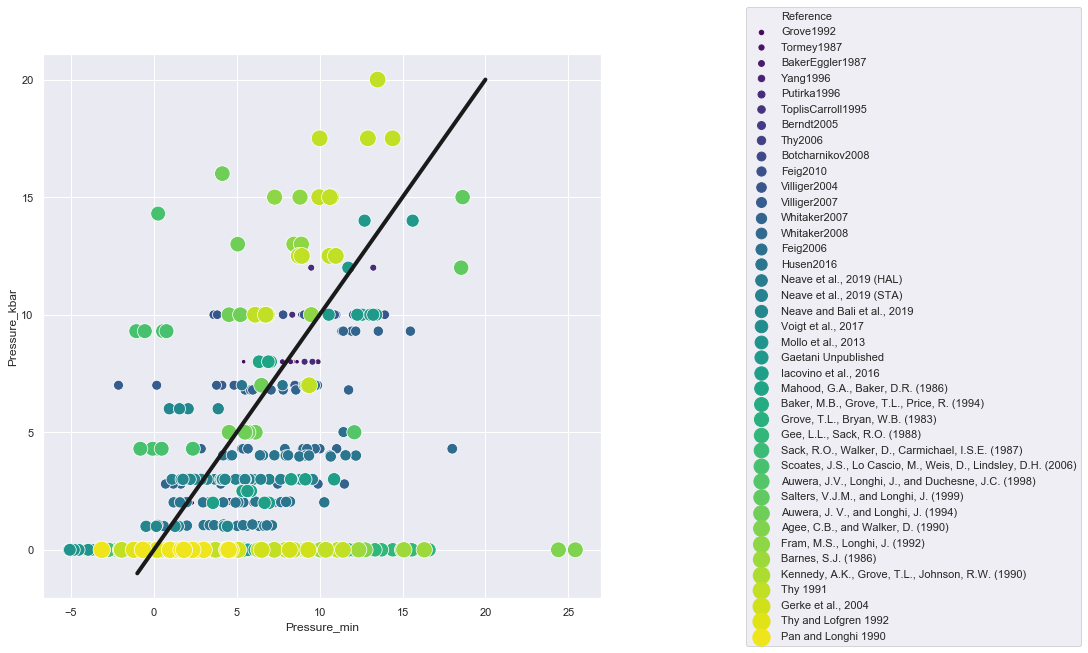

In [24]:
#plot results before probability filter
'Known experimental pressure versus Predicted pressure'
sns.set_style()
sns.set(rc={'figure.figsize':(10.0,10)})
ax = sns.scatterplot(x="Pressure_min", y="Pressure_kbar", data=df, hue='Reference', palette = "viridis", size = 'Reference', sizes = (300, 20), legend="full")
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


#creating 1:1 line
x = np.linspace(-1,20,100)
y = 1*x+0
plt.plot(x, y, '-k', linewidth=4.0)
plt.show()

In [25]:
df['delta_P'] = df['Pressure_min']-df['Pressure_kbar']

#Finding Mean Absolute Error
df['Absolute_error']=abs(df['delta_P'])
print (df['Absolute_error'])
Sum_of_error = sum(df['Absolute_error'])
print (Sum_of_error)
N = len(df.index)
print (N)
MAE = Sum_of_error/N
print (MAE)


Experiment
KN-54-2-2-1    5.963669
KN-54-2-2-1    7.121233
KN-54-2-2-1    6.202563
KN-54-2-2-1    4.167967
KN-54-2-2-1    1.531970
                 ...   
A16P50-3       1.672984
A19P50-1       4.507395
A21P50-1       0.663707
A22P50-1       1.813388
A23P50-1       3.141312
Name: Absolute_error, Length: 709, dtype: float64
2610.1550572254077
709
3.681459883251633


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
#Finding RMSE
import math

#Residuals squared
df['Sqrd_Rsd']=df['delta_P']**2
#print (df['Sqrd_Rsd'])

#mean of residuals
Res = sum(df['Sqrd_Rsd'])
print (Res)
M = len(df.index)
print (M)
Mean_Res = Res/M
print (Mean_Res)

#Squared root of mean residuals
RMSE = math.sqrt(Mean_Res)
print (RMSE)

18188.36000902578
709
25.653540210191508
5.064932399370352


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:


fig = px.scatter(df, y="Na2O+K2O", x='Absolute_error',   marginal_x="histogram", marginal_y="histogram", color='Alkalinity (S)',color_continuous_scale=px.colors.diverging.Spectral, title="Absolute error Vs Alkalinity ")
fig.show()

In [28]:
fig = px.scatter(df, x="delta_P", y="Probability", marginal_x="violin", marginal_y="histogram", color='Alkalinity (S)',color_continuous_scale=px.colors.diverging.Spectral, title="Delta_P vs Alkalinity")
fig.show()

In [29]:
#selecting data frames for pressure ranges
atm = df[df['Pressure_kbar']== 0.001]
atm_to_1kbar = df[df['Pressure_kbar'].between(0.01,1.00)]
One_2kbar = df[df['Pressure_kbar'].between(1.0001,2.00)]
Two_3kbar = df[df['Pressure_kbar'].between(2.0001,3)]
Three_4kbar = df[df['Pressure_kbar'].between(3.0001,4)]
Four_5kbar = df[df['Pressure_kbar'].between(4.0001,5)]
Five_6kbar = df[df['Pressure_kbar'].between(5.0001,6)]
Six_7kbar = df[df['Pressure_kbar'].between(6.0001,7)]
Seven_8kbar = df[df['Pressure_kbar'].between(7.0001,8)]
Above_8kbar = df[df['Pressure_kbar']>8.00]

In [30]:
import plotly.express as px
fig = px.violin(atm, x="delta_P", title= "Experimental 1 atm vs calculated range")
fig.show()

In [31]:
fig = px.violin(atm_to_1kbar, x="delta_P", title= "Experimental Up to 1kbar vs calculated range")
fig.show()

In [32]:
fig = px.violin(One_2kbar, x="delta_P", title= "Experimental 1-2kbar vs calculated range")
fig.show()

In [33]:
fig = px.violin(Two_3kbar, x="delta_P", title= "Experimental 2-3kbar vs calculated range")
fig.show()

In [34]:
fig = px.violin(Three_4kbar, x="delta_P", title= "Experimental 3-4kbar vs calculated range")
fig.show()

In [35]:
fig = px.violin(Four_5kbar, x="delta_P", title= "Experimental 4-5kbar vs calculated range")
fig.show()

In [36]:
fig = px.violin(Five_6kbar, x="delta_P", title= "Experimental 5-6kbar vs calculated range")
fig.show()

In [37]:
fig = px.violin(Six_7kbar, x="delta_P", title= "Experimental 6-7kbar vs calculated range")
fig.show()

In [38]:
fig = px.violin(Seven_8kbar, x="delta_P", title= "Experimental 7-8kbar vs calculated range")
fig.show()

In [39]:
fig = px.violin(Above_8kbar, x="delta_P", title= "Experimental >8kbar vs calculated range")
fig.show()

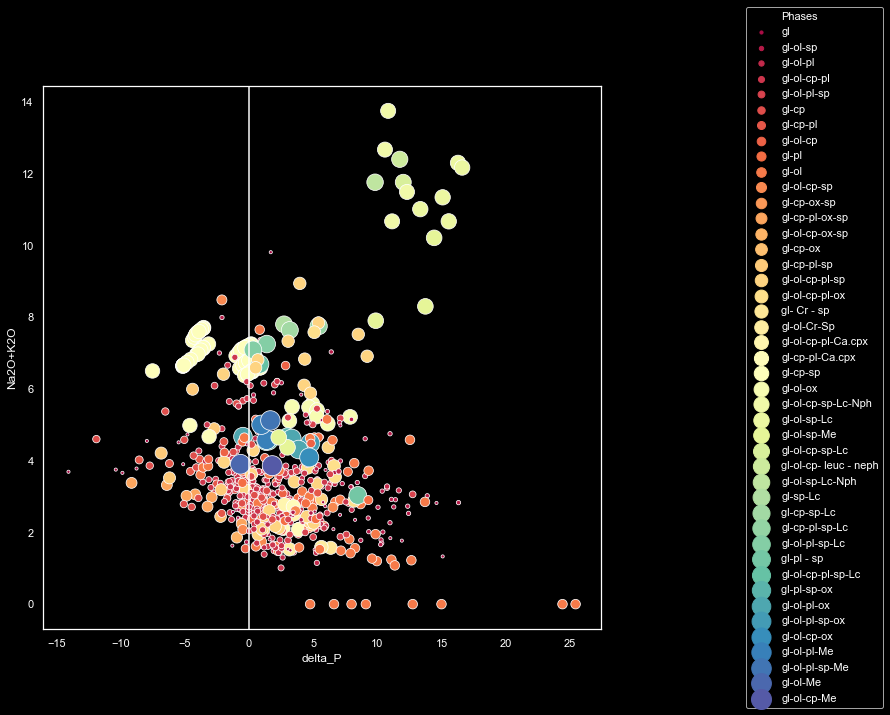

In [40]:
sns.set_style("dark")
plt.style.use("dark_background")
#sns.set(rc={'figure.figsize':(10.0,10)})
ax = sns.scatterplot(x="delta_P", y="Na2O+K2O", data=df, hue='Phases', palette = "Spectral", size = 'Phases', sizes = (400, 10), legend="full")
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.axvline(0)

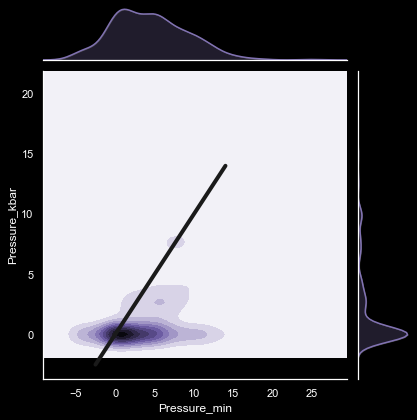

In [41]:
#distribution plot
plot = sns.jointplot(x="Pressure_min", y="Pressure_kbar", data=df, kind="kde",color="m")
plot.ax_joint.plot( [-2.5,14], [-2.5, 14], 'k', linewidth = 4)


In [42]:
fig = px.scatter(df, x="Pressure_min", y="Pressure_kbar",  labels={"Pressure_min": "Calculated Pressure",  "Pressure_kbar": "Experimental Pressure"},  marginal_x="histogram", marginal_y="histogram", color='Pressure_kbar',color_continuous_scale=px.colors.sequential.Viridis, title="Experimental vs Calculated pressure")
fig.show()

In [43]:
fig = px.scatter(df, x="Pressure_min", y="Pressure_kbar", color='Alkalinity (S)', labels={"Pressure_min": "Calculated Pressure",  "Pressure_kbar": "Experimental Pressure"},color_continuous_scale=px.colors.sequential.Inferno, title="Experimental vs Calculated pressure")
fig.show()

#Alkalinity (S) - alkalinity of samples with respect to Sub-alkaline threshold

In [44]:
fig = px.scatter(df, x="Pressure_min", y="Pressure_kbar",   labels={"Pressure_min": "Calculated Pressure",  "Pressure_kbar": "Experimental Pressure"},  template= "plotly_dark", marginal_x="histogram", marginal_y="histogram",  color='Alkalinity (S)', color_continuous_scale=px.colors.diverging.Spectral, color_continuous_midpoint=0, title="Experimental vs Calculated pressure")
fig.show()

#Alkalinity (S) - alkalinity of samples with respect to Sub-alkaline threshold
#Positive values are subalkaline

In [45]:
fig = px.scatter(df, x="Pressure_min", y="Pressure_kbar",  
                 template = "plotly_dark", 
                 marginal_x="histogram", 
                 marginal_y="histogram", 
                 color='Alkalinity (A)', 
                 color_continuous_scale=px.colors.diverging.Spectral, 
                 color_continuous_midpoint=0, 
                 title="Experimental vs Calculated pressure", 
                 labels={"Pressure_min": "Calculated Pressure",  "Pressure_kbar": "Experimental Pressure"})

fig.show()

#Alkalinity (S) - alkalinity of samples with respect to alkaline threshold
#positive values are either subalkaline or transitional compositions

In [46]:
fig = px.density_heatmap(df, x="Pressure_min", y="Pressure_kbar", nbinsx=50, nbinsy=20, marginal_x="histogram", marginal_y="histogram",color_continuous_scale=px.colors.sequential.ice, )
fig.show()

In [47]:
#filter out data with low probability (<0.80)
df_Thn = df['Probability']>0.80
df_prob = df[df_Thn]
df_up = df_prob.copy()

#check dataframe
print (df_up.shape)


(218, 28)


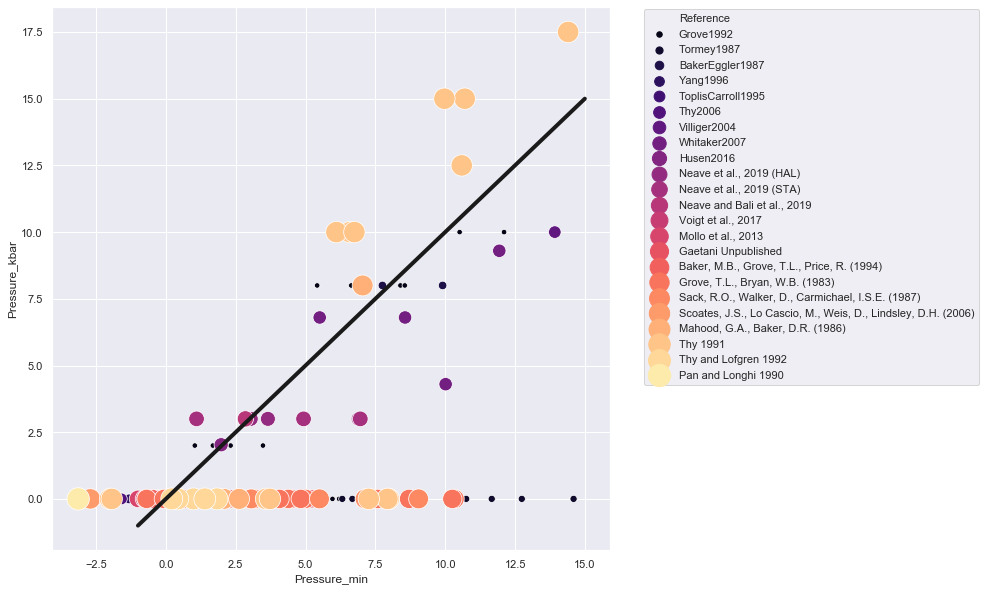

In [49]:
#after probability filter
'Known experimental pressure versus Predicted pressure'
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10.0,10)})
ax = sns.scatterplot(x="Pressure_min", y="Pressure_kbar", data=df_up, hue='Reference', palette = "magma", size = 'Reference', sizes = (500, 30), legend="full")
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.65), ncol=1)
#creating 1:1 line
x = np.linspace(-1,15,100)
y = 1*x+0
plt.plot(x, y, '-k', linewidth=4.0)
plt.show()

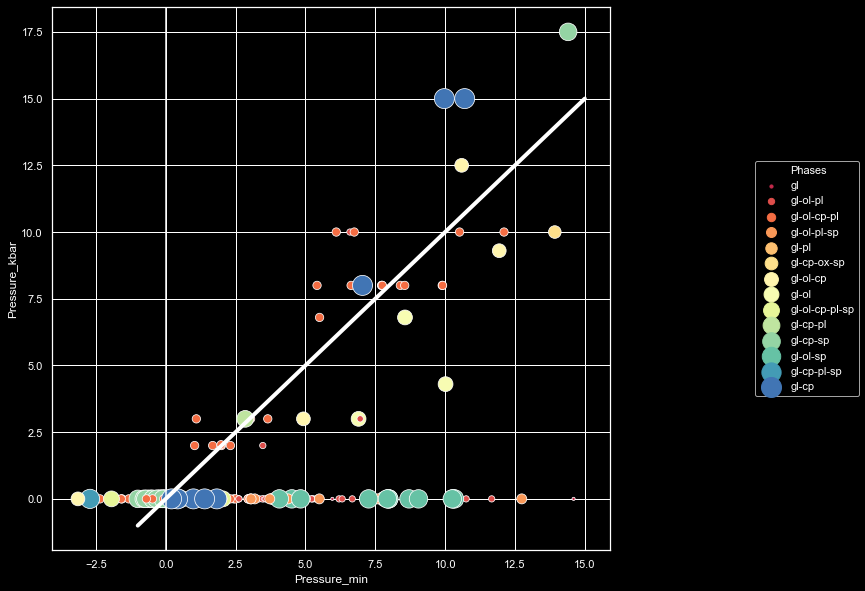

In [50]:

plt.style.use("dark_background")
#sns.set(rc={'figure.figsize':(10.0,10)})
ax = sns.scatterplot(x="Pressure_min", y="Pressure_kbar", data=df_up, hue='Phases', palette = "Spectral", size = 'Phases', sizes = (400, 10), legend="full")
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.axvline(0)

x = np.linspace(-1,15,100)
y = 1*x+0
plt.plot(x, y, '-w', linewidth=4.0)
plt.show()

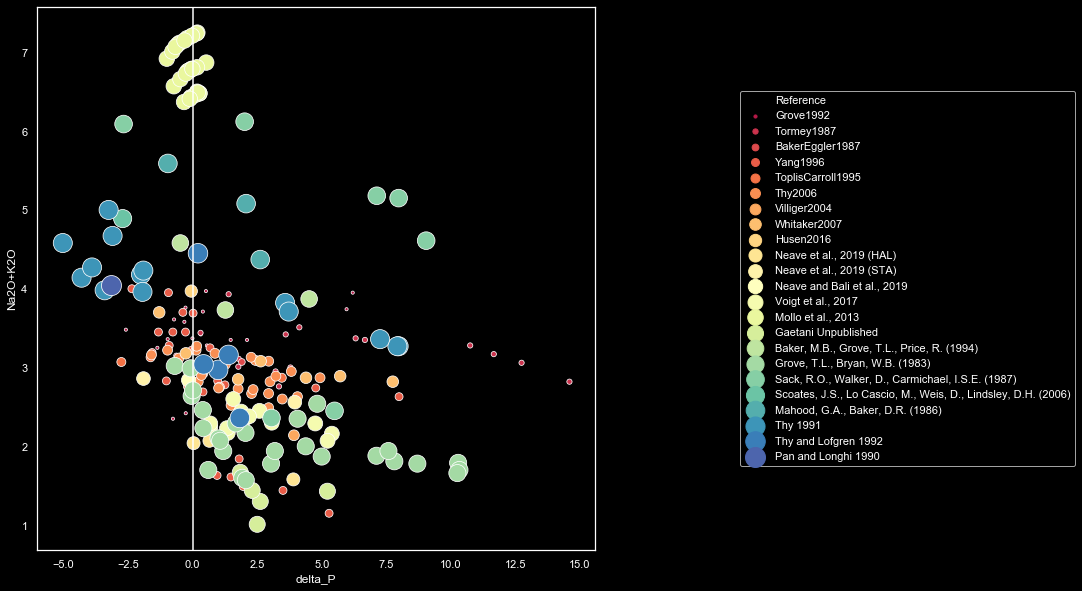

In [51]:
sns.set_style("dark")
plt.style.use("dark_background")
#sns.set(rc={'figure.figsize':(10.0,10)})
ax = sns.scatterplot(x="delta_P", y="Na2O+K2O", data=df_up, hue='Reference', palette = "Spectral", size = 'Reference', sizes = (400, 10), legend="full")
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.axvline(0)

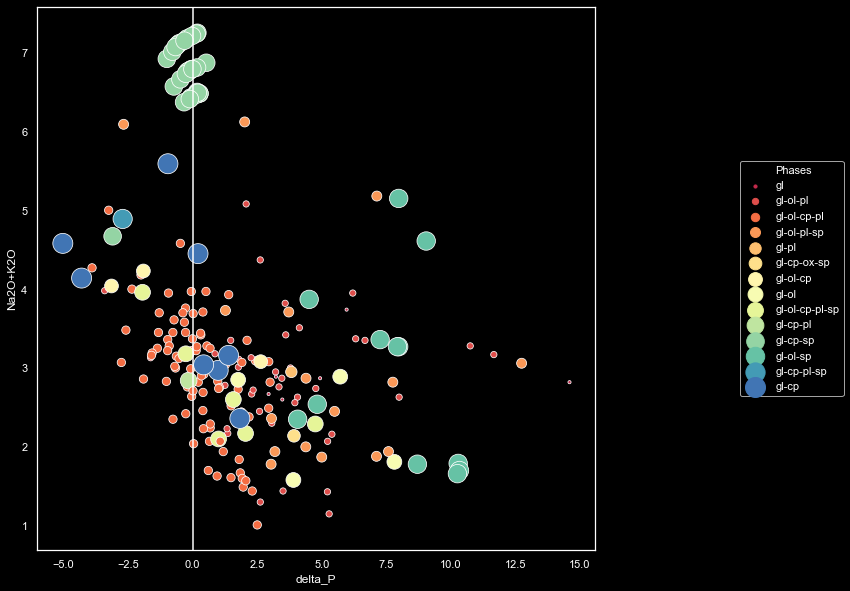

In [52]:
sns.set_style("dark")
plt.style.use("dark_background")
#sns.set(rc={'figure.figsize':(10.0,10)})
ax = sns.scatterplot(x="delta_P", y="Na2O+K2O", data=df_up, hue='Phases', palette = "Spectral", size = 'Phases', sizes = (400, 10), legend="full")
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.axvline(0)

In [53]:
import plotly.express as px

fig = px.scatter(df_up, x="Pressure_min", y="Pressure_kbar", labels={"Pressure_min": "Calculated Pressure",  "Pressure_kbar": "Experimental Pressure"},  marginal_x="histogram", marginal_y="histogram",color='Alkalinity (A)',color_continuous_scale=px.colors.sequential.Magma, title="Experimental vs Calculated pressure")

fig.show()
#Alkalinity (S) - alkalinity of samples with respect to alkaline threshold

In [54]:
df_up

,Reference,Pressure_kbar,Pressure_error,Temperature_degC,Phases,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,Cr2O3,Total,Alk Line,Sub line,Alkalinity (S),Alkalinity (A),Na2O+K2O,Pressure_min,Probability,delta_P,Absolute_error,Sqrd_Rsd
Experiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KN-54-2-2-1,Grove1992,0.001,0.00001,1210,gl,51.400,1.55000,16.100,8.550000,0.15000,7.960,10.20,3.46,0.28,0.00,0.00,0.06000,99.71000,7.3200,4.676600,0.936600,3.5800,3.74,5.964669,0.977532,5.963669,5.963669,35.565343
KN-54-2-2-1,Grove1992,0.001,0.00001,1205,gl-ol-pl,51.200,1.66000,16.200,9.910000,0.23000,7.500,10.10,3.65,0.30,0.00,0.00,0.07000,100.82000,7.1600,4.573800,0.623800,3.2100,3.95,6.203563,0.878380,6.202563,6.202563,38.471785
KN-54-2-2-1,Grove1992,0.001,0.00001,1161,gl-ol-cp-pl,51.900,2.38000,13.600,11.300000,0.23000,6.060,10.40,3.27,0.34,0.00,0.00,0.06000,99.54000,7.7200,4.933600,1.323600,4.1100,3.61,-0.717450,0.820937,-0.718450,0.718450,0.516171
ALV-1690-20,Grove1992,2.000,0.02,1176,gl-ol-pl,49.700,1.93000,14.300,10.700000,0.22000,7.190,10.60,3.17,0.18,0.25,0.00,0.00000,98.24000,5.9600,3.802800,0.452800,2.6100,3.35,3.475565,0.980222,1.475565,1.475565,2.177292
ALV-1690-20,Grove1992,2.000,0.02,1163,gl-ol-cp-pl,49.800,2.35000,13.600,12.200000,0.25000,6.700,10.50,3.23,0.19,0.32,0.00,0.00000,99.14000,6.0400,3.854200,0.434200,2.6200,3.42,2.316884,0.896354,0.316884,0.316884,0.100416
ALV-1690-20,Grove1992,2.000,0.02,1152,gl-ol-cp-pl,50.000,2.47000,13.700,11.700000,0.19000,6.600,10.50,3.36,0.22,0.36,0.00,0.00000,99.10000,6.2000,3.957000,0.377000,2.6200,3.58,1.681299,0.966585,-0.318701,0.318701,0.101570
ALV-1690-20,Grove1992,2.000,0.02,1148,gl-ol-cp-pl,49.800,2.30000,13.700,12.000000,0.22000,6.680,10.70,3.18,0.19,0.32,0.00,0.00000,99.09000,6.0400,3.854200,0.484200,2.6700,3.37,1.994374,0.985431,-0.005626,0.005626,0.000032
ALV-1690-20,Grove1992,2.000,0.02,1145,gl-ol-cp-pl,49.800,3.32000,12.900,12.900000,0.27000,6.080,9.86,3.11,0.25,0.43,0.00,0.00000,98.92000,6.0400,3.854200,0.494200,2.6800,3.36,1.035496,0.986987,-0.964504,0.964504,0.930268
AII-96-18-1,Grove1992,8.000,0.5,1240,gl-ol-cp-pl,50.200,1.40000,15.800,9.480000,0.14000,8.010,10.60,3.13,0.12,0.15,0.00,0.05000,99.08000,6.3600,4.059800,0.809800,3.1100,3.25,6.636051,0.959800,-1.363949,1.363949,1.860357


In [55]:
fig = px.scatter(df_up, x="Probability", y='Na2O+K2O', marginal_x="histogram", marginal_y="histogram", color='Alkalinity (S)',color_continuous_scale=px.colors.diverging.Spectral, title="Alkalinity vs Probability (Filtered P from 0.80)")
fig.show()

In [56]:
Sum_of_error = sum(df_up['Absolute_error'])
print (Sum_of_error)
N2 = len(df_up.index)
print (N2)
MAE = Sum_of_error/N2
print (MAE)


536.2176478048297
218
2.4597139807560993


In [57]:
#Finding RMSE

#Residuals squared
df_up['Sqrd_Rsd']=df_up['delta_P']**2
#print (df['Sqrd_Rsd'])

#mean of residuals
F_Res = sum(df_up['Sqrd_Rsd'])
print (F_Res)
M = len(df_up.index)
print (M)
Mean_Res = F_Res/M
print (Mean_Res)

#Squared root of mean residuals
Filtered_RMSE = math.sqrt(Mean_Res)
print (Filtered_RMSE)

2860.2036052744093
218
13.120200024194538
3.6221816663710475


In [58]:
import plotly.express as px

fig = px.scatter(df_up, x="Pressure_min", y="Pressure_kbar",  marginal_x="histogram", marginal_y="histogram",color='Alkalinity (A)',color_continuous_scale=px.colors.diverging.RdBu, title="Experimental vs Calculated pressure")

fig.show()
#Alkalinity (A) - alkalinity of samples with respect to alkaline threshold

In [59]:
#turn dataframe back to csv file
df_up.to_csv('Filtered_OPAM_CHi_minimisation.csv')

#or Excel
#writer = pd.ExcelWriter('myDataFrame.xlsx')
#df.to_excel(writer, 'DataFrame')
#writer.save()